In [2]:
# based on the simulation for 3600s
# the energy consumption will increase with the increasement of bitrate
# in this script, it will research the energy consumption for different bitrate in terms of simulation time
import matplotlib.pyplot as plt
import json
import itertools
import numpy as np
import pandas as pd
import re
from matplotlib.ticker import MaxNLocator
import matplotlib.ticker as ticker

In [3]:
duration = [5704,10716,29380,156900]
result = {}

In [4]:
for d in duration:
    title = '{}'.format(d)
    result[title] = {}
    with open('./examples/mesh/results/link_quality_with_distance/3600s-{}/log.txt'.format(d),'r') as f: 
            text = f.read()
            path_loss = re.findall('path_loss_dbm = (.+?),',text)
            distance = re.findall('current distance is (.+)',text)
            for i in range(len(path_loss)):
                path_loss[i] = float(path_loss[i])
            for i in range(len(distance)):
                distance[i] = float(distance[i])
            result[title]["path loss"] = path_loss
            result[title]["distance"] = distance

In [5]:
# save the stats
json_str = json.dumps(result)
with open('./examples/mesh/single_model_result/link_quality_with_distance.json','w') as f:
    f.write(json_str)

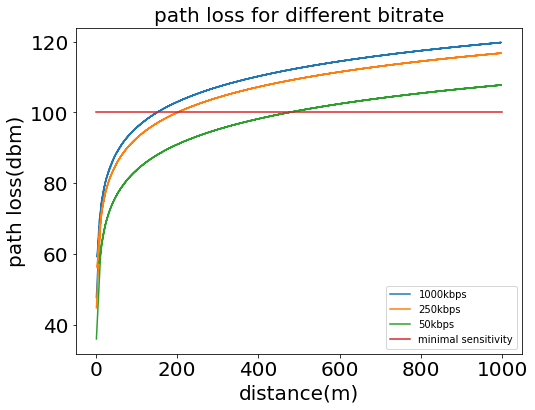

In [7]:
# plot 
# reload the data
with open('./examples/mesh/single_model_result/link_quality_with_distance.json','r') as f:
    result = json.load(f)


# set picture size
plt.figure(figsize=(8, 6))
# set picture title
plt.title('path loss for different bitrate',fontsize=20)
# plot
plt.plot(result['5704']['distance'],result['5704']['path loss'],label='1000kbps')
plt.plot(result['10716']['distance'],result['10716']['path loss'],label='250kbps')
plt.plot(result['29380']['distance'],result['29380']['path loss'],label='50kbps')
#plt.plot(result['156900']['distance'],result['156900']['path loss'],label='8kbps')

# set benchmark, minimal sensitivity = -100dbm
plt.plot([q for q in range(0,1000,1)],[100]*1000,label='minimal sensitivity')

plt.legend(fontsize=30)
# set labels
plt.xlabel('distance(m)',fontsize=20)
plt.ylabel('path loss(dbm)',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
# plt.xticks(range(len(max_std)))
#plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%1.1f'))
#plt.gca().yaxis.set_major_formatter(ticker.FormatStrFormatter('%d'))
#plt.yticks( np.arange(0, 210, 30))
plt.legend()
plt.savefig('./examples/mesh/single_model_diff_packet_period/path_loss_for_different_bitrate.jpg',bbox_inches = 'tight')
plt.show()

# as the result,
# maximum distance:
# 8kbps : 574.6m
# 50kbps : 474.3m
# 250kpbs : 200.0m
# 1000kbps : 150.9m